In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function, division
%matplotlib inline

# Compare Shape Measurements

In [4]:
simname = 'Illustris-1'
snapnum = str(135)

# open shapes file
import h5py
basePath = '/Volumes/G-RAID/simulations/unprocessed/Illustris/Illustris-1'
f = h5py.File(basePath + '/stellar_circs.hdf5', 'r')
t_0 = f.get('Snapshot_'+snapnum)

from astropy.table import Table

fname = simname + '_' + snapnum + '_' + 'reduced' + '_' +'galaxy_shapes'+ '.dat' 
t_1 = Table.read('../data/shape_catalogs/'+fname, format='ascii')

fname = simname + '_' + snapnum + '_' + 'iterative' + '_' +'galaxy_shapes'+ '.dat' 
t_2 = Table.read('../data/shape_catalogs/'+fname, format='ascii')

IOError: Unable to open file (unable to open file: name = '/Volumes/G-RAID/simulations/unprocessed/Illustris/Illustris-1/stellar_circs.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

/Users/duncan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/duncan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


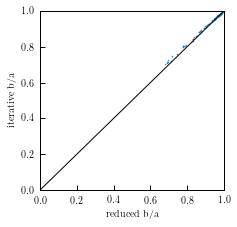

/Users/duncan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/duncan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


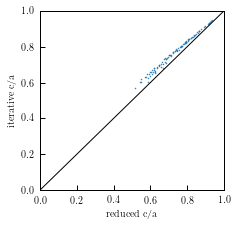

In [17]:
plt.figure(figsize=(3.3,3.3))
plt.plot(t_1['b']/t_1['a'], t_2['b']/t_2['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('reduced b/a')
plt.ylabel('iterative b/a')
plt.show()

plt.figure(figsize=(3.3,3.3))
plt.plot(t_1['c']/t_1['a'], t_2['c']/t_2['a'], '.', ms=1)
plt.plot([0,1],[0,1], '-', color='black', lw=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('reduced c/a')
plt.ylabel('iterative c/a')
plt.show()

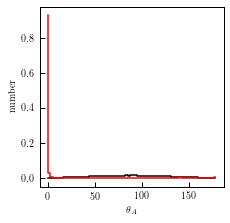

In [42]:
Av_1 = np.vstack((t_1['av_x'], t_1['av_y'], t_1['av_x'])).T
Av_2 = np.vstack((t_2['av_x'], t_2['av_y'], t_2['av_x'])).T

from rotations.vector_utilities import angles_between_list_of_vectors

ran_vecs = np.random.random((len(t_1),3))*2-1.0
theta_0 = np.degrees(angles_between_list_of_vectors(Av_2, ran_vecs))

bins = np.linspace(0,180,100)
counts_0 = np.histogram(theta_0, bins=bins)[0]
counts_0 = 1.0*counts_0/np.sum(counts_0)

theta_1 = np.degrees(angles_between_list_of_vectors(Av_1, Av_2))

bins = np.linspace(0,180,100)
counts_1 = np.histogram(theta_1, bins=bins)[0]
counts_1 = 1.0*counts_1/np.sum(counts_1)

plt.figure(figsize=(3.3,3.3))
plt.step(bins[:-1], counts_0, '-', color='black')
plt.step(bins[:-1], counts_1, '-', color='red')
plt.xlabel(r'$\theta_A$')
plt.ylabel('number')
plt.show()

In [44]:
np.min(theta_0)

0.9537281841011733